In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
results = pd.read_csv("results0529.csv")

In [4]:
results.head(10)

,Match,code,theo_tag,aw_tag,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,tag,-1,GPE.NATION,GPE.SPECIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,match,POLITICIANS/PER.GROUP,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,match,PARLIAMENTARY/ORG.MED,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,match,ASSEMBLY/ORG.MED,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,match,OF/ORG.MED,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,COUNCIL/ORG.MED/ORG.MED,COUNCIL/ORG.MED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,tag,-1,ORG.MED,ORG.MED,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,OF/ORG.MED/ORG.MED,OF/ORG.MED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,tag,-1,ORG.MED,ORG.MED,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,EUROPE/LOC.null/ORG.MED/ORG.MED,EUROPE/ORG.MED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 11 columns):
Match          1007 non-null object
code           997 non-null object
theo_tag       899 non-null object
aw_tag         380 non-null object
Unnamed: 4     1 non-null object
Unnamed: 5     1 non-null object
Unnamed: 6     1 non-null object
Unnamed: 7     1 non-null object
Unnamed: 8     1 non-null object
Unnamed: 9     1 non-null object
Unnamed: 10    1 non-null object
dtypes: object(11)
memory usage: 90.0+ KB


In [6]:
results.Match.value_counts().reset_index().head()

,index,Match
0,match,518
1,notag,216
2,tag,154
3,File:,18
4,------------,9


In [7]:
results_notags = results[results.Match == "notag"]

In [8]:
results_notags[:5]

,Match,code,theo_tag,aw_tag,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
11,notag,-2,STRONG/GPE.NATION,STRONG,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,notag,-2,COALITION/GPE.NATION,COALITION,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,notag,-3,GOVERNMENT/GPE.NATION,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,notag,-2,LONELY,LONELY/ORG.NGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,notag,-3,GROUP,GROUP/ORG.NGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
results_tags = results[results.Match == "tag"]

In [10]:
results_tags[:5]

,Match,code,theo_tag,aw_tag,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,tag,-1,GPE.NATION,GPE.SPECIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,tag,-1,ORG.MED,ORG.MED,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,tag,-1,ORG.MED,ORG.MED,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,tag,-1,LOC.null,ORG.MED,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,tag,-1,GPE.NATION,GPE.SPECIAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most common "error": Tag -1, notag -2 or notag -3? 
    

In [11]:
tags = results.groupby("Match")

In [12]:
tags = results['Match'].value_counts().head()

In [13]:
tags

match           518
notag           216
tag             154
File:            18
------------      9
Name: Match, dtype: int64

Most common difference btw theo/aw tags?


In [14]:
#results_notags.theo_tag.value_counts().head(5)
t_notag_counts = results_notags['theo_tag'].value_counts()

In [15]:
t_notag_counts.head(5)

SEABED/LOC.null       5
DEEP/LOC.null         5
STATES/LOC.null       4
MAJORITY/PER.GROUP    4
WE/ORG.GOV            4
Name: theo_tag, dtype: int64

In [16]:
t_tag_counts = results_tags['theo_tag'].value_counts()

In [17]:
t_tag_counts.head(5)

ORG.NGO       30
GPE.NATION    27
LOC.null      26
PER.IND       18
ORG.GOV       17
Name: theo_tag, dtype: int64

In [18]:
#results_notags.aw_tag.value_counts().head(5)
aw_notag_counts = results_notags['aw_tag'].value_counts()

In [19]:
aw_notag_counts.head(5)

IN        6
SEABED    5
DEEP      5
STATES    5
MAJOR     4
Name: aw_tag, dtype: int64

In [20]:
aw_tag_counts = results_tags['aw_tag'].value_counts()

In [21]:
aw_tag_counts.head(5)

GPE.NATION     28
GPE.SPECIAL    20
LOC.null       18
PER.IND        17
ORG.GOV        17
Name: aw_tag, dtype: int64

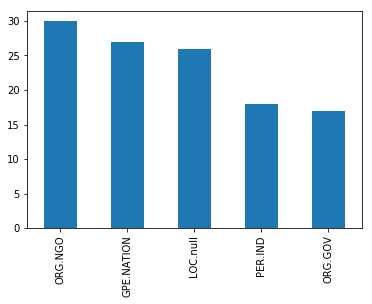

In [22]:
t_tag_counts[:5].plot(kind='bar')

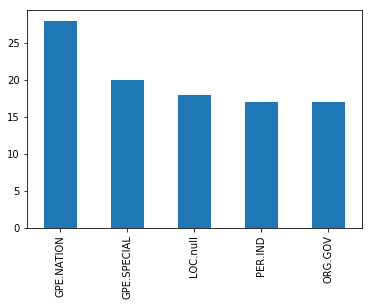

In [23]:
aw_tag_counts[:5].plot(kind='bar')